# WPROWADZENIE DO SZTUCZNEJ INTELIGENCJI - LABORATORIUM 5

+ AUTOR: **ŁUKASZ STANISZEWSKI**
+ NR INDEKSU: **304098**
+ ADRES E-MAIL: **lukasz.staniszewski.stud@pw.edu.pl**
+ KIERUNEK: **INFORMATYKA**
+ PRZEDMIOT: **Wprowadzenie do sztucznej inteligencji**
+ ZADANIE: **[LINK](https://apps.usos.pw.edu.pl/apps/f/tj3yNYKD/lab5.pdf)**
+ SYSTEM OPERACYJNY: **Windows 10**
+ JĘZYK PROGRAMOWANIA: **Python 3.8**
+ TEMAT: **Należy zaimplementować naiwny klasyfikator Bayesa. Korzystając z tego klasyfikatora należy zbadać, która para atrybutów ze zbioru danych wine pozwala osiągnąć najlepszą dokładność klasyfikacji**.

## 1. Import niezbędnych modułów
+ **sklearn.datasets.load_wine** - zbiór danych to wine, można go pobrać za pomocą tej metody
+ **pandas** - praca nad tabelami
+ **pyplot** oraz **seaborn** - wykresy
+ **numpy** - macierze, tablice
+ **math** - funkcje matematyczne

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math

## 2. Zbiór wine
+ w tym miejscu zostanie pobrany zbiór wine, a jego elementy zestawione w formie tabeli

In [2]:
wine_set = load_wine()                 # loading wine dataset
df_wine = pd.DataFrame(wine_set['data'], columns=wine_set.feature_names)    # creating table dataframe of values
pd.set_option("display.max_rows", None)
df_wine.index.name = 'wine index'
df_wine['class'] = [id for id in wine_set.target]    # appending name of class
df_wine    # showing full dataframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
wine index,,,,,,,,,,,,,,
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045.0,0


+ dodatkowo zostaną przedstawione wykresy (w 2D) jak wyglądają poszczególne klasy w zależności od przykładowych parametrów

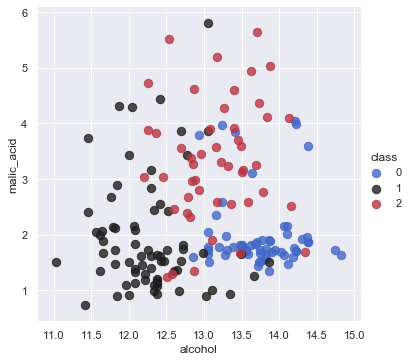

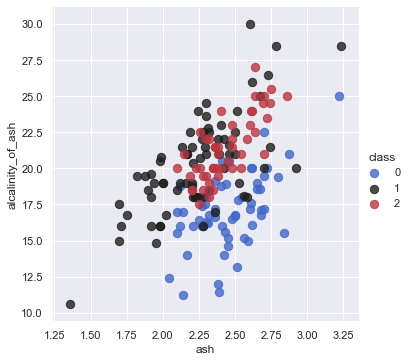

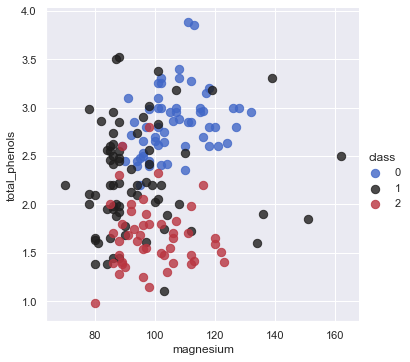

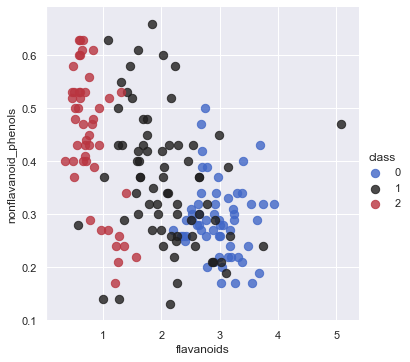

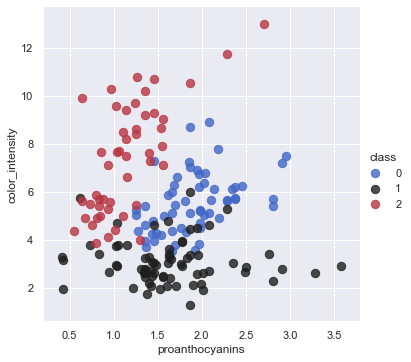

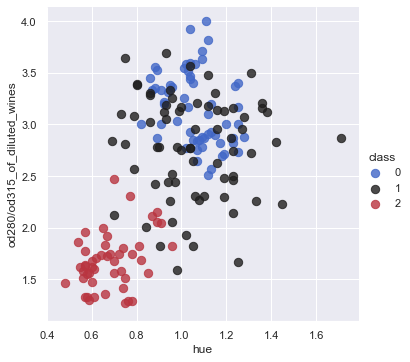

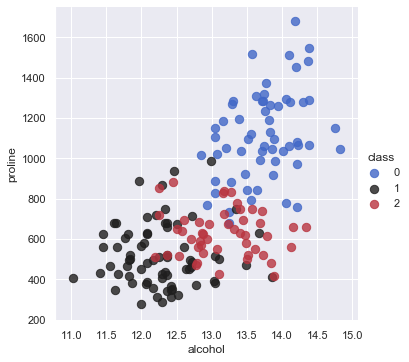

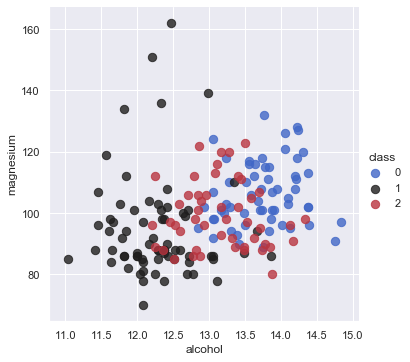

In [3]:
seaborn.set(rc={'figure.figsize':(20, 20)})
seaborn.lmplot(x='alcohol', y='malic_acid', data=df_wine, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='ash', y='alcalinity_of_ash', data=df_wine, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='magnesium', y='total_phenols', data=df_wine, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='flavanoids', y='nonflavanoid_phenols', data=df_wine, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='proanthocyanins', y='color_intensity', data=df_wine, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='hue', y='od280/od315_of_diluted_wines', data=df_wine, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='alcohol', y='proline', data=df_wine, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='alcohol', y='magnesium', data=df_wine, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})

+ a także nastąpi podzielenie zbioru wine na podzbiory dla każdej klasy poprzez stworzenie słownika który pod kluczem przechwouje zbiór próbek danej klasy:

In [34]:
def separateClassesToDictionary(data):
    # function will create dictionary where key will be class number and values will be samples for that class
    separatedClasses = dict()
    # for every sample
    for i in range(len(data)):
        attributes = data[i]
        classVal = attributes[-1]
        # if class of sample is not already in dictionary
        if (classVal not in separatedClasses):
            separatedClasses[classVal] = list()
        # append sample to key's samples
        separatedClasses[classVal].append(attributes)
    # returning dictionary
    return separatedClasses

separated_dictionary = separateClassesToDictionary(np.array(df_wine))

## 3. Zdefiniowanie problemu
### 3.1. Ogólnie
+ Zadanie polega na znalezieniu dla każdej klasy ($i$) i dla każdej cechy ($j$) z tej klasy Gaussowską funkcję gęstości prawdopodobieństwa:
$$ f_{X_{ij}}(x) = \frac{1}{{\sigma_{ij} \sqrt {2\pi } }}exp\{{ {  -(x - \mu_{ij} )^2\over{2\sigma_{ij} ^2 }}}\}$$

+ W tym celu należy wyliczyć dla zbioru trenującego każdej klasy i cechy z tej klasy:
    + Wartość oczekiwaną (μ) za pomocą wzoru: $$ \mu = {{1 \over n}*\sum_{i=1}^n x_i} $$ 
    + Odchylenie standardowe (σ) ze wzoru: $$ \sigma = \sqrt{{1 \over n-1}*\sum_{i=1}^n (x_i - \mu)^2}$$

+ A następnie za pomocą wzoru Bayesa obliczyć prawdopodobieństwo należenia do danej klasy pod warunkiem prawdopodobieńtwa posiadania danych wartości cech według wzoru: $$ P(class | atributes) = {P(atributes|class) * P(class)} = P(atribute_1|class) * ... * P(atribute_n|class) * P(class)$$
    + UWAGA: wzór został uproszczony poprzez usunięcie mianownika $ P(atributes) $, ponieważ ułatwi to obliczenia, a nie wprowadza on żadnych zmian w przypadku porównywania prawdopodobieństw
    + Dla tego zadania: $n=2$

+ Tak więc p-stwo należenia do klasy $i$ pod warunkiem wartości cech $j_1 : x_{j1}$ oraz $j_2 : x_{j2}$ będzie liczone za pomocą wzoru: $$ P(class_i | atribute_{j_1}, atribute_{j_2}) = f_{X_{ij_1}} * f_{X_{ij_2}} * P(class_i)$$
    + gdzie $P(class_i) = {liczba\_probek\_klasy\_i \over liczba\_probek\_wszystkich\_klas}$ 

+ Aby zbadać skuteczność metody klasyfikacji w zależoności od wybranej pary cech, zostanie zastosowany algorytm k-krotnej walidacji krzyżowej. 

### 3.2. Implementacja niezbędnych funkcji
+ funkcja **gaussianDensity(x, wart_oczekiwana, odchylenie_standardowe)** -> zwraca wartość gauusowskiej gęstości prawdopodobieństwa dla danego x
+ funkcja **calculateMean(zbiorX)** -> zwraca wartość oczekiwaną dla danego zbioru liczb
+ funkcja **calculateSTDDEV(zbiorX)** -> zwraca odchylenie standardowe dla danego zbioru liczb
+ funkcja **getSetsForValidation(slownikProbek, liczbaKlas, dlugoscZbioruTestujacego, iteratorWalidacyjny, indexAtrybutuMierzonego)** -> tworzy zbiory próbek dla danego parametru i danej klasy
+ funkcja **crossValidation(k, slownikProbek, indexPierwszyAtrybut, indexDrugiAtrybut, liczbaKlas)** -> implementacja walidacji krzyżowej
+ funkcja **getSetStatistics(zbiorKlasX)** -> zwraca wartości oczekiwane i odchylenia standardowe dla każdej klasy i danego atrybutu
+ funkcja **getSuccessRate(zbiorTestujacyAtr0, zbiorTestujacyAtr1, srednieAtr0, odchyleniaAtr0, srednieAtr1, odchyleniaAtr1)** -> zwraca procent sukcesu dla danego zbioru testujacego przy danych parametrach rozkładu 

In [33]:
def gaussianDensity(x, mean, stddev):
    # counting gaussian density probability function according to equation given above
    exponent = math.exp(-1*((x-mean)**2)/(2*(stddev**2)))
    return exponent / (stddev * math.sqrt(2 * math.pi))

def calculateMean(set_of_xs):
    # calculating mean of given data
    return sum(set_of_xs)/len(set_of_xs)

def calculateSTDDEV(set_of_xs):
    # calculating standard deviation of given data
    mean = calculateMean(set_of_xs)
    summ=0
    for xi in set_of_xs:
        summ += (xi - mean)**2
    return math.sqrt(summ/(len(set_of_xs)-1))

def getSetsForValidation(separated_dictionary, n_of_classes, length_of_testing, iteratorValidation, attribute_index):
    # will return training and testing sets for every class separated
    training_sets = []
    testing_sets = []
    # creating training set by taking everything except testing set and vice versa for testing set
    for targetClass in range(n_of_classes):
        training_sets.append(np.concatenate((np.array(separated_dictionary[targetClass])[:iteratorValidation*length_of_testing, attribute_index], np.array(separated_dictionary[targetClass])[(iteratorValidation+1)*length_of_testing: , attribute_index])))
        testing_sets.append(np.array(separated_dictionary[targetClass])[iteratorValidation*length_of_testing:(iteratorValidation+1)*length_of_testing, attribute_index])
    # returning lists of training in testing sets for each class
    return training_sets, testing_sets

def crossValidation(k, separated_dictionary, index_first_atr, index_second_atr, n_of_classes):
    # length of testing set
    length_of_testing = len(separated_dictionary[0])//k
    sum_success = 0
    # for i = 0, 1, ..., k-1
    for iteratorValidation in range(k):
        # getting training and testing sets for both attributes
        training_sets_atr0, testing_sets_atr0 = getSetsForValidation(separated_dictionary, n_of_classes, length_of_testing, iteratorValidation, index_first_atr)
        training_sets_atr1, testing_sets_atr1 = getSetsForValidation(separated_dictionary, n_of_classes, length_of_testing, iteratorValidation, index_second_atr)
        # getting means and standard deviations for every class for both attributes
        means_atr0, stddevs_atr0 = getSetStatistics(training_sets_atr0)
        means_atr1, stddevs_atr1 = getSetStatistics(training_sets_atr1)
        # sum of success ratings for every validation
        sum_success += getSuccessRate(testing_sets_atr0, testing_sets_atr1, means_atr0, stddevs_atr0, means_atr1, stddevs_atr1)
    # divieding sum by number of validation to get avarage success on set
    return sum_success / k
        
def getSetStatistics(set_of_classes_xs):
    # function returns means and standard deviations for each classess for both attributes
    means = []
    stddevs = []
    # taking set of xs in class
    for set_of_xs_in_class in set_of_classes_xs:
        means.append(calculateMean(set_of_xs_in_class))
        stddevs.append(calculateSTDDEV(set_of_xs_in_class))
    # returning both
    return means, stddevs

def getSuccessRate(testing_sets_atr0, testing_sets_atr1, means_atr0, stddevs_atr0, means_atr1, stddevs_atr1):
    # function returns success rate of classification of testing set
    how_many_good = 0
    n_of_samples = 0
    # getting number of all samples used in test sets
    for testing_class_set in testing_sets_atr0:
        n_of_samples += len(testing_class_set)
    # for every class:
    for iteratorClasses in range(len(testing_sets_atr0)):
        attribute0XS = testing_sets_atr0[iteratorClasses]
        attribute1XS = testing_sets_atr1[iteratorClasses]
        # for every sample in each class:
        for sample in range(len(attribute0XS)):
            # take x from first and second attribute
            atr0X = attribute0XS[sample]
            atr1X = attribute1XS[sample]
            # program will choose class with highest probability
            best_score = -math.inf
            best_class = None
            # for every class:
            for classNumber in range(len(means_atr0)):
                # take means of class of both attributes
                mean0 = means_atr0[classNumber]
                mean1 = means_atr1[classNumber]
                # take standard deviations of class of both attributes
                stddev0 = stddevs_atr0[classNumber]
                stddev1 = stddevs_atr1[classNumber]
                # count probability of sample being in a given class provided sample's attributes
                probability = ((len(testing_sets_atr0[iteratorClasses]) / n_of_samples) * gaussianDensity(atr0X, mean0, stddev0)
                               * gaussianDensity(atr1X, mean1, stddev1))
                # if best probability so far among all of classes
                if probability > best_score:
                    best_score = probability
                    best_class = classNumber
            # checking whether classificator chose correct class
            if best_class == iteratorClasses:
                how_many_good += 1
    # returning percent of succesfull classifications
    return how_many_good / n_of_samples

## 4. Sprawdzenie, która para atrybutów ze zbioru danych pozwala osiągnąć najlepszą jakość klasyfikacji
+ W tym celu zostanie zaimplementowana funkcja oceniająca klasyfikację dokonaną na parze atrybutów za pomocą walidacji krzyżowej o parametrze k:

In [41]:
def findBestPair(k):
    print("LOOKING FOR BEST PAIR OF ATTRIBUTES!")
    # maximalizing
    best_avg_score = -math.inf
    best_pairs = []
    # first attribute
    for attribute1 in range(len(wine_set.data[0]) - 1):
        # second attribute
        for attribute2 in range(attribute1 + 1, len(wine_set.data[0])):
            # getting avarage score from best k-folded cross Validation
            avg_score = crossValidation(k, separated_dictionary, attribute1, attribute2, 3)
            # actual score
            print(f"~~SCORE FOR ATTRIBUTES: ({attribute1},{attribute2})={round(100 * avg_score,4)}%")
            # checking if better than actual best score
            if(avg_score > best_avg_score):
                best_pairs = []
                best_avg_score = avg_score
                best_pairs.append([attribute1, attribute2])
            # if best score is reapeating, it is neccessary to give all best pairs of attributes
            elif(avg_score == best_avg_score):
                best_pairs.append([attribute1, attribute2])
    # showing all best pairs
    for pair in best_pairs:
        print(f"BEST PAIR = ({pair[0]},{pair[1]}) WITH SCORE = {round(100*best_avg_score,4)}%")
            

+ następnie zostaje przeprowadzona symulacja dla **k=3**:

In [42]:
findBestPair(3)

LOOKING FOR BEST PAIR OF ATTRIBUTES!
~~SCORE FOR ATTRIBUTES: (0,1)=79.1301%
~~SCORE FOR ATTRIBUTES: (0,2)=68.75%
~~SCORE FOR ATTRIBUTES: (0,3)=77.8143%
~~SCORE FOR ATTRIBUTES: (0,4)=68.75%
~~SCORE FOR ATTRIBUTES: (0,5)=82.4927%
~~SCORE FOR ATTRIBUTES: (0,6)=89.4737%
~~SCORE FOR ATTRIBUTES: (0,7)=77.595%
~~SCORE FOR ATTRIBUTES: (0,8)=79.3494%
~~SCORE FOR ATTRIBUTES: (0,9)=77.3392%
~~SCORE FOR ATTRIBUTES: (0,10)=88.6696%
~~SCORE FOR ATTRIBUTES: (0,11)=88.1944%
~~SCORE FOR ATTRIBUTES: (0,12)=82.9678%
~~SCORE FOR ATTRIBUTES: (1,2)=63.9985%
~~SCORE FOR ATTRIBUTES: (1,3)=61.5497%
~~SCORE FOR ATTRIBUTES: (1,4)=71.5643%
~~SCORE FOR ATTRIBUTES: (1,5)=71.9298%
~~SCORE FOR ATTRIBUTES: (1,6)=81.5789%
~~SCORE FOR ATTRIBUTES: (1,7)=60.2705%
~~SCORE FOR ATTRIBUTES: (1,8)=64.364%
~~SCORE FOR ATTRIBUTES: (1,9)=75.1462%
~~SCORE FOR ATTRIBUTES: (1,10)=67.617%
~~SCORE FOR ATTRIBUTES: (1,11)=67.7266%
~~SCORE FOR ATTRIBUTES: (1,12)=80.7749%
~~SCORE FOR ATTRIBUTES: (2,3)=59.4298%
~~SCORE FOR ATTRIBUTES: (2,4

+ dla **k=4**:

In [43]:
findBestPair(4)

LOOKING FOR BEST PAIR OF ATTRIBUTES!
~~SCORE FOR ATTRIBUTES: (0,1)=80.9874%
~~SCORE FOR ATTRIBUTES: (0,2)=70.4482%
~~SCORE FOR ATTRIBUTES: (0,3)=79.2017%
~~SCORE FOR ATTRIBUTES: (0,4)=69.7129%
~~SCORE FOR ATTRIBUTES: (0,5)=84.1036%
~~SCORE FOR ATTRIBUTES: (0,6)=90.4762%
~~SCORE FOR ATTRIBUTES: (0,7)=78.6064%
~~SCORE FOR ATTRIBUTES: (0,8)=77.8711%
~~SCORE FOR ATTRIBUTES: (0,9)=82.458%
~~SCORE FOR ATTRIBUTES: (0,10)=88.8655%
~~SCORE FOR ATTRIBUTES: (0,11)=88.0952%
~~SCORE FOR ATTRIBUTES: (0,12)=83.3683%
~~SCORE FOR ATTRIBUTES: (1,2)=63.0602%
~~SCORE FOR ATTRIBUTES: (1,3)=61.8697%
~~SCORE FOR ATTRIBUTES: (1,4)=71.9538%
~~SCORE FOR ATTRIBUTES: (1,5)=70.9384%
~~SCORE FOR ATTRIBUTES: (1,6)=81.5826%
~~SCORE FOR ATTRIBUTES: (1,7)=60.084%
~~SCORE FOR ATTRIBUTES: (1,8)=63.3754%
~~SCORE FOR ATTRIBUTES: (1,9)=76.8207%
~~SCORE FOR ATTRIBUTES: (1,10)=65.7563%
~~SCORE FOR ATTRIBUTES: (1,11)=70.3431%
~~SCORE FOR ATTRIBUTES: (1,12)=83.9636%
~~SCORE FOR ATTRIBUTES: (2,3)=64.986%
~~SCORE FOR ATTRIBUTES: 

+ dla **k=5**:

In [44]:
findBestPair(5)

LOOKING FOR BEST PAIR OF ATTRIBUTES!
~~SCORE FOR ATTRIBUTES: (0,1)=80.8858%
~~SCORE FOR ATTRIBUTES: (0,2)=70.2564%
~~SCORE FOR ATTRIBUTES: (0,3)=79.2308%
~~SCORE FOR ATTRIBUTES: (0,4)=70.6993%
~~SCORE FOR ATTRIBUTES: (0,5)=82.704%
~~SCORE FOR ATTRIBUTES: (0,6)=91.5152%
~~SCORE FOR ATTRIBUTES: (0,7)=77.8555%
~~SCORE FOR ATTRIBUTES: (0,8)=78.4615%
~~SCORE FOR ATTRIBUTES: (0,9)=81.4918%
~~SCORE FOR ATTRIBUTES: (0,10)=90.1399%
~~SCORE FOR ATTRIBUTES: (0,11)=89.0909%
~~SCORE FOR ATTRIBUTES: (0,12)=82.5408%
~~SCORE FOR ATTRIBUTES: (1,2)=62.6107%
~~SCORE FOR ATTRIBUTES: (1,3)=62.7739%
~~SCORE FOR ATTRIBUTES: (1,4)=70.979%
~~SCORE FOR ATTRIBUTES: (1,5)=70.6527%
~~SCORE FOR ATTRIBUTES: (1,6)=82.704%
~~SCORE FOR ATTRIBUTES: (1,7)=59.5804%
~~SCORE FOR ATTRIBUTES: (1,8)=63.9394%
~~SCORE FOR ATTRIBUTES: (1,9)=78.2984%
~~SCORE FOR ATTRIBUTES: (1,10)=65.641%
~~SCORE FOR ATTRIBUTES: (1,11)=72.634%
~~SCORE FOR ATTRIBUTES: (1,12)=83.7529%
~~SCORE FOR ATTRIBUTES: (2,3)=64.5921%
~~SCORE FOR ATTRIBUTES: (2

+ wnioski z przeprowadzonych symulacji:
    + bazując na wszystkich 3 symulacjach, można zauważyć, że parami atrybutów zapewniającymi najlepszą klasyfikację są pary: **(0,6) -> (alcohol,flavanoids)** oraz 
    **(11,12) -> (od280/od315_of_diluted_wines, proline)**
    + średnia skuteczność klasyfikacj dla tych metod to ~ 91%, co jest bardzo dobrym wynikiem, patrząc na fakt, że klasyfikator Bayesa działa w sposób 'naiwny' oraz, że jest to średni sukces na podstawie walidacji krzyżowej. 